<a href="https://colab.research.google.com/github/Ambilirathi/Ambili.Rathi.BDAT1004PS1/blob/main/Bank_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

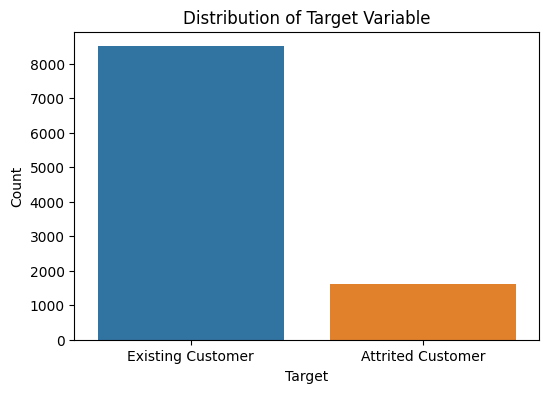

In [3]:
# Install PySpark
!pip install pyspark

# Import required libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Visualize the distribution of the target variable
target_distribution = data.groupBy("Attrition_Flag").count().toPandas()

plt.figure(figsize=(6, 4))
sns.barplot(x='Attrition_Flag', y='count', data=target_distribution)

plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Stop Spark session
spark.stop()


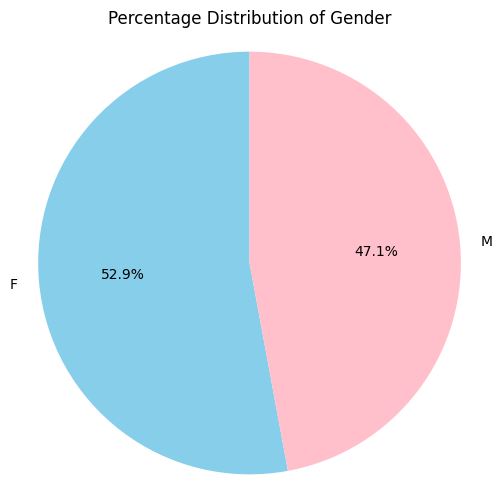

In [5]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Calculate the percentage distribution of gender using Spark DataFrame operations
gender_distribution = data.groupBy("Gender").count()
total_count = gender_distribution.agg({"count": "sum"}).collect()[0][0]
gender_distribution = gender_distribution.withColumn("percentage", (gender_distribution["count"] / total_count) * 100)

# Convert Spark DataFrame to Pandas for plotting
gender_distribution_pd = gender_distribution.toPandas()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution_pd['percentage'], labels=gender_distribution_pd['Gender'], autopct='%.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Percentage Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# Stop Spark session
spark.stop()

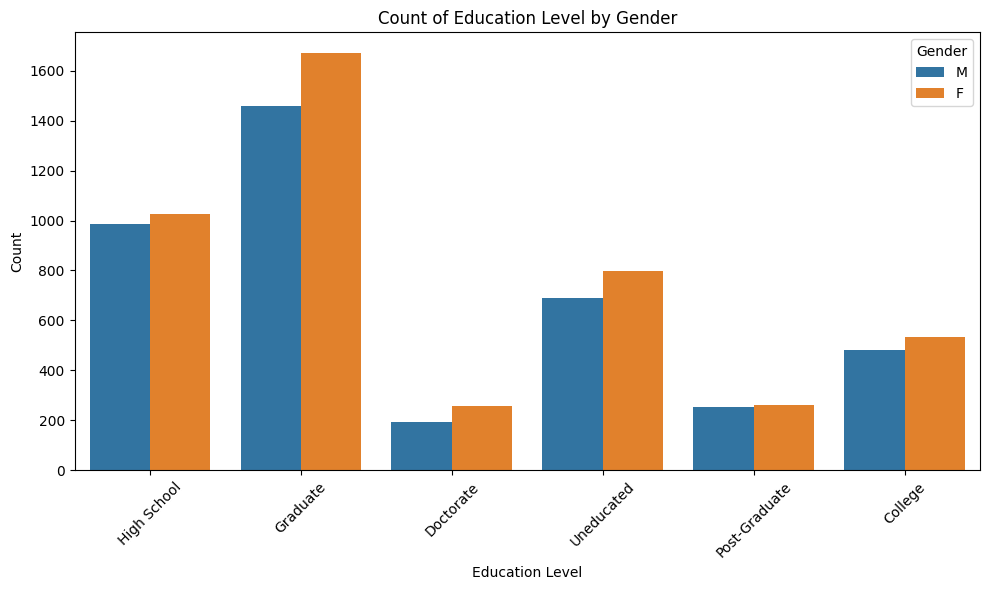

In [10]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Filter out rows with 'Unknown' education level using Spark DataFrame operations
filtered_data = data.filter(data['Education_Level'] != 'Unknown')

# Group data by education level and gender and count occurrences
education_gender_counts = filtered_data.groupBy("Education_Level", "Gender").count()

# Convert Spark DataFrame to Pandas for plotting
education_gender_counts_pd = education_gender_counts.toPandas()

# Create a bar plot using Pandas and Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Level', y='count', hue='Gender', data=education_gender_counts_pd)
plt.title('Count of Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Stop Spark session
spark.stop()

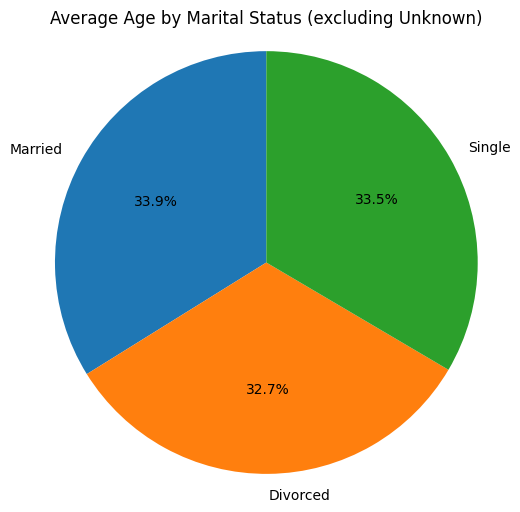

In [13]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Filter out rows with 'Unknown' marital status using Spark DataFrame operations
filtered_data = data.filter(data['Marital_Status'] != 'Unknown')

# Calculate the average age for each marital status using Spark DataFrame operations
average_age_by_status = filtered_data.groupBy('Marital_Status').agg({"Customer_Age": "avg"})

# Convert Spark DataFrame to Pandas for plotting
average_age_by_status_pd = average_age_by_status.toPandas()

# Create a pie chart using Pandas and Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(average_age_by_status_pd['avg(Customer_Age)'], labels=average_age_by_status_pd['Marital_Status'], autopct='%.1f%%', startangle=90)
plt.title('Average Age by Marital Status (excluding Unknown)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# Stop Spark session
spark.stop()

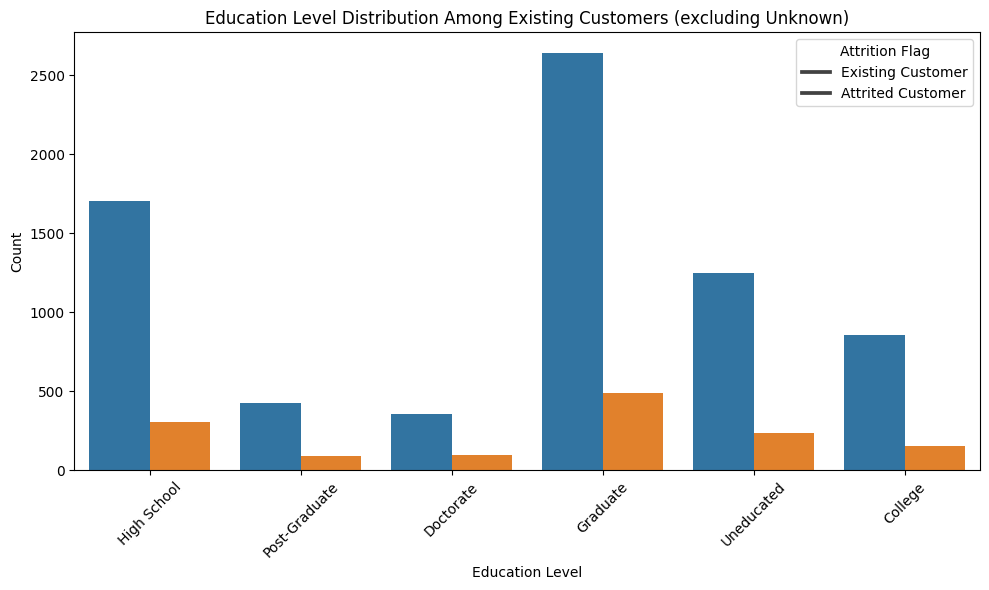

In [20]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Filter out rows with 'Unknown' education level using Spark DataFrame operations
filtered_data = data.filter(data['Education_Level'] != 'Unknown')

# Group data by education level and attrition flag and count occurrences using Spark DataFrame operations
education_attrition_counts = filtered_data.groupBy('Education_Level', 'Attrition_Flag').count()

# Convert Spark DataFrame to Pandas for plotting
education_attrition_counts_pd = education_attrition_counts.toPandas()

# Create a bar plot using Pandas and Matplotlib
plt.figure(figsize=(10, 6))
education_plot = sns.barplot(x='Education_Level', y='count', data=education_attrition_counts_pd, hue='Attrition_Flag')
plt.title('Education Level Distribution Among Existing Customers (excluding Unknown)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.tight_layout()

# Show the plot
plt.show()

# Stop Spark session
spark.stop()

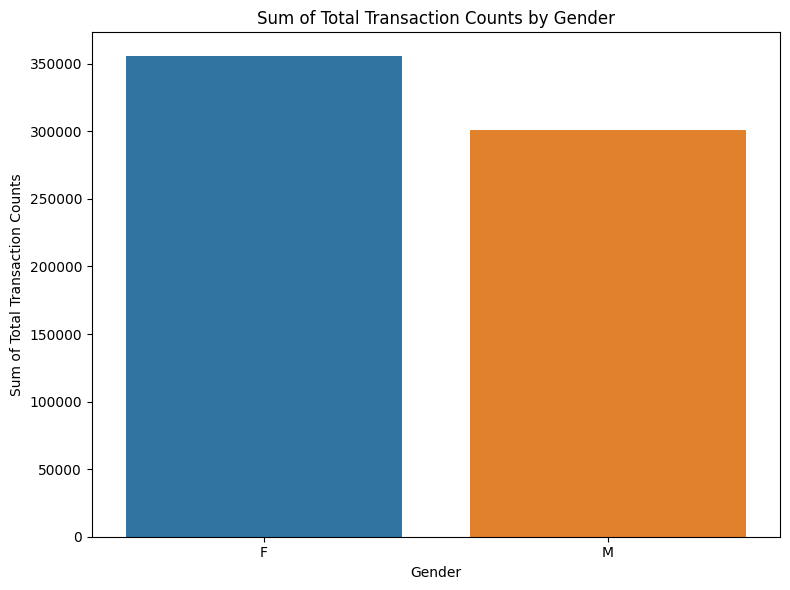

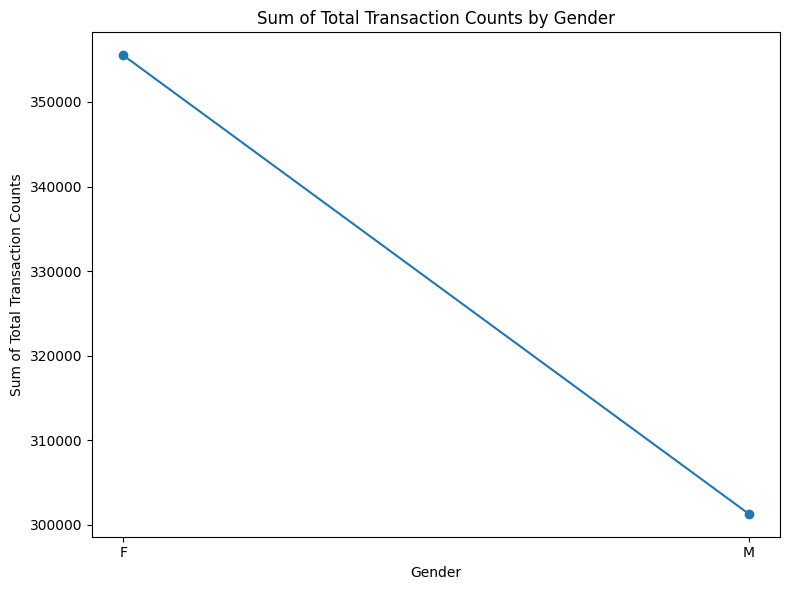

In [22]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Create a bar plot for sum of total transaction counts by gender
plt.figure(figsize=(8, 6))
data_gender_transaction = data.groupby('Gender').agg({'Total_Trans_Ct': 'sum'}).toPandas()
sns.barplot(x='Gender', y='sum(Total_Trans_Ct)', data=data_gender_transaction)
plt.title('Sum of Total Transaction Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum of Total Transaction Counts')
plt.tight_layout()
plt.show()

# Calculate the sum of total transaction counts by gender
sum_transaction_by_gender = data.groupby('Gender').agg({'Total_Trans_Ct': 'sum'}).toPandas()

# Create a line plot for sum of total transaction counts by gender
plt.figure(figsize=(8, 6))
plt.plot(sum_transaction_by_gender['Gender'], sum_transaction_by_gender['sum(Total_Trans_Ct)'], marker='o')
plt.title('Sum of Total Transaction Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum of Total Transaction Counts')
plt.tight_layout()
plt.show()

# Stop Spark session
spark.stop()

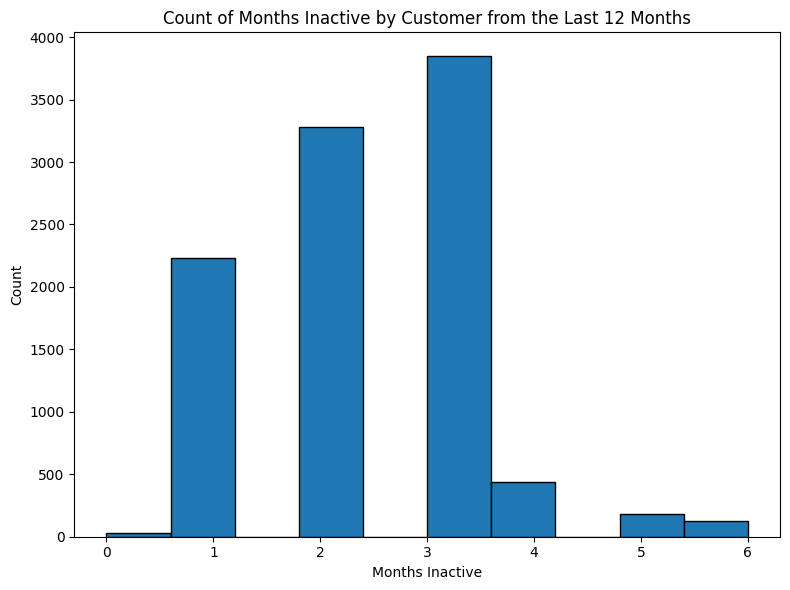

In [24]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Filter the data for the last 12 months using Spark DataFrame operations
data_last_12_months = data.filter(data['Months_Inactive_12_mon'] <= 12)

# Convert Spark DataFrame to Pandas for histogram plotting
data_last_12_months_pd = data_last_12_months.select('Months_Inactive_12_mon').toPandas()

# Create a histogram for the count of months inactive by customer from the last 12 months
plt.figure(figsize=(8, 6))
plt.hist(data_last_12_months_pd['Months_Inactive_12_mon'], bins=10, edgecolor='k')
plt.title('Count of Months Inactive by Customer from the Last 12 Months')
plt.xlabel('Months Inactive')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Stop Spark session
spark.stop()

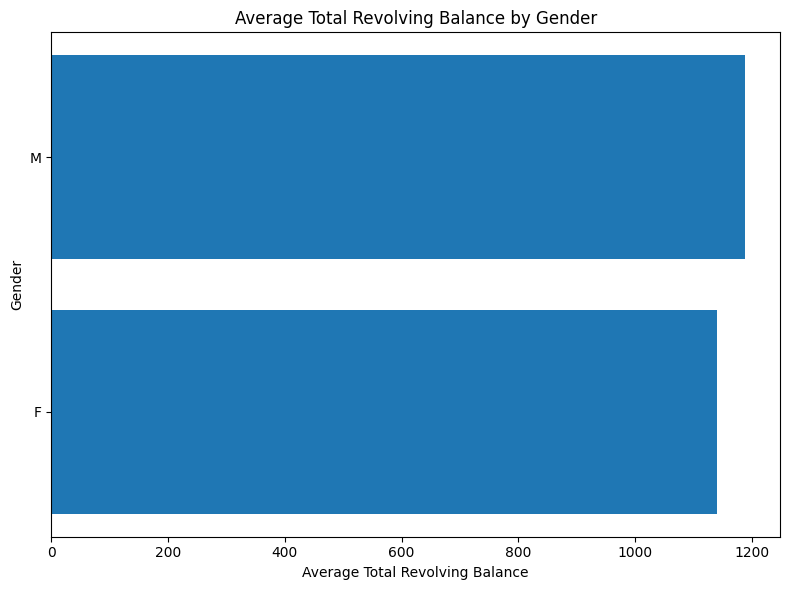

In [28]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Calculate the mean total revolving balance by gender using Spark DataFrame operations
mean_balance_by_gender = data.groupBy('Gender').agg({'Total_Revolving_Bal': 'mean'}).toPandas()

# Rename the aggregated column for clarity
mean_balance_by_gender.rename(columns={'avg(Total_Revolving_Bal)': 'Average_Total_Revolving_Bal'}, inplace=True)

# Create a horizontal bar plot for the average total revolving balance by gender
plt.figure(figsize=(8, 6))
plt.barh(mean_balance_by_gender['Gender'], mean_balance_by_gender['Average_Total_Revolving_Bal'])
plt.title('Average Total Revolving Balance by Gender')
plt.xlabel('Average Total Revolving Balance')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

# Stop Spark session
spark.stop()

<ipython-input-30-a785da5d5d6d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.drop('CLIENTNUM').toPandas().corr()


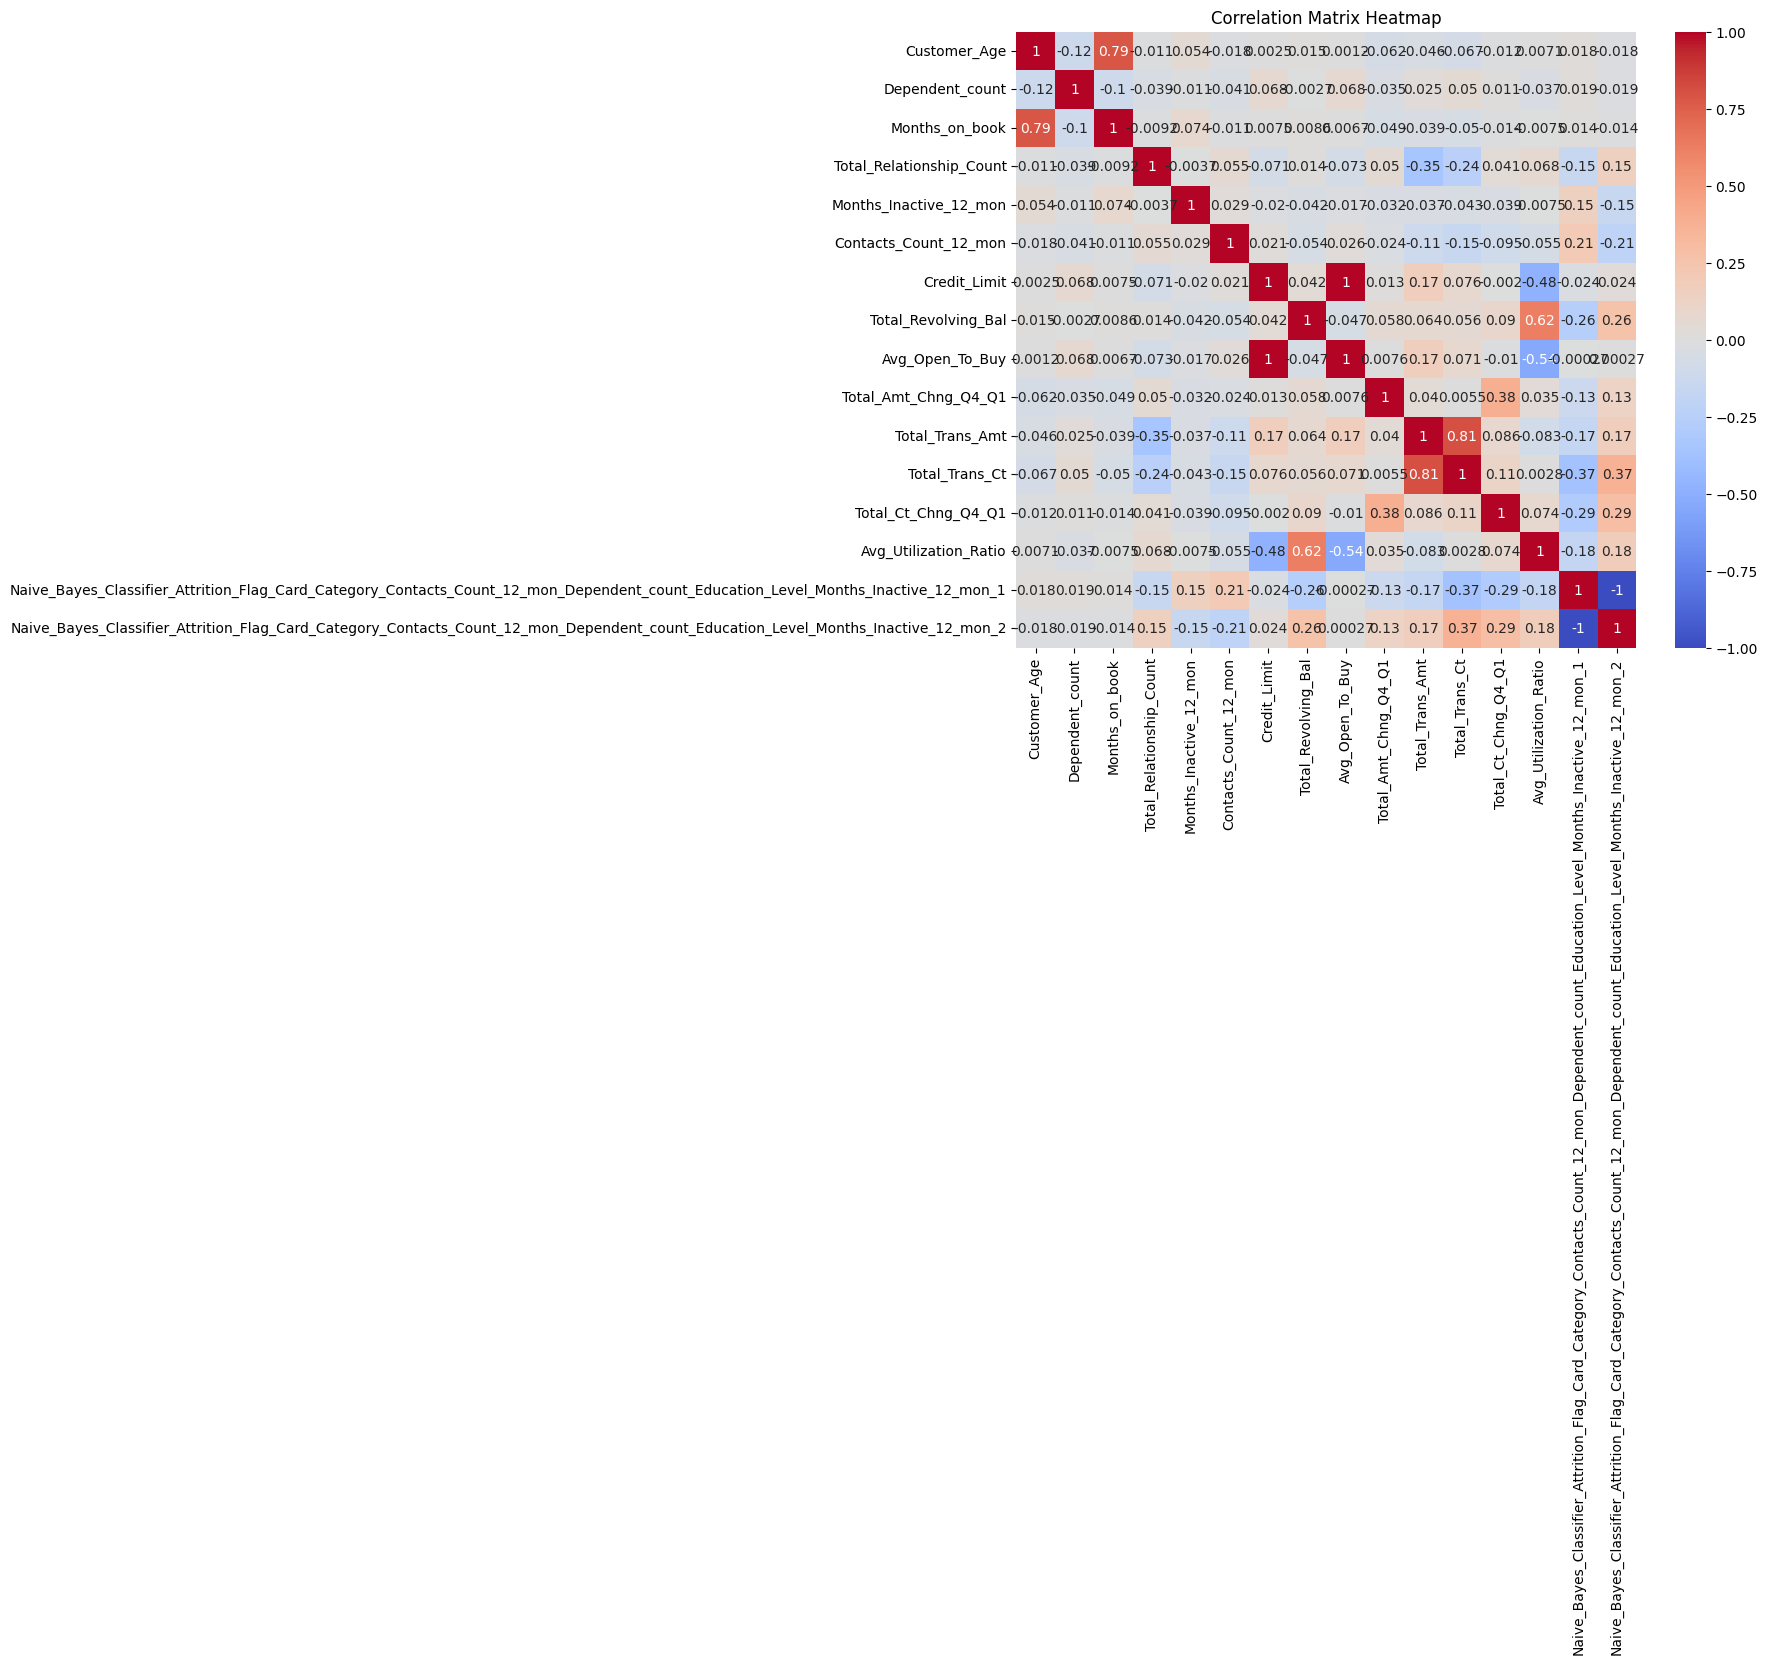

In [30]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkExample").getOrCreate()

# Load the dataset
data = spark.read.csv("/content/BankChurners.csv", header=True, inferSchema=True)

# Calculate the correlation matrix using Spark DataFrame operations
correlation_matrix = data.drop('CLIENTNUM').toPandas().corr()

# Create a correlation matrix heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Stop Spark session
spark.stop()